                                  Hours_Studied  Previous_Scores  Sleep_Hours  \
Hours_Studied                          1.000000        -0.012390     0.001245   
Previous_Scores                       -0.012390         1.000000     0.005944   
Sleep_Hours                            0.001245         0.005944     1.000000   
Sample_Question_Papers_Practiced       0.017463         0.007888     0.003990   
Performance_Index                      0.373730         0.915189     0.048106   

                                  Sample_Question_Papers_Practiced  \
Hours_Studied                                             0.017463   
Previous_Scores                                           0.007888   
Sleep_Hours                                               0.003990   
Sample_Question_Papers_Practiced                          1.000000   
Performance_Index                                         0.043268   

                                  Performance_Index  
Hours_Studied                         

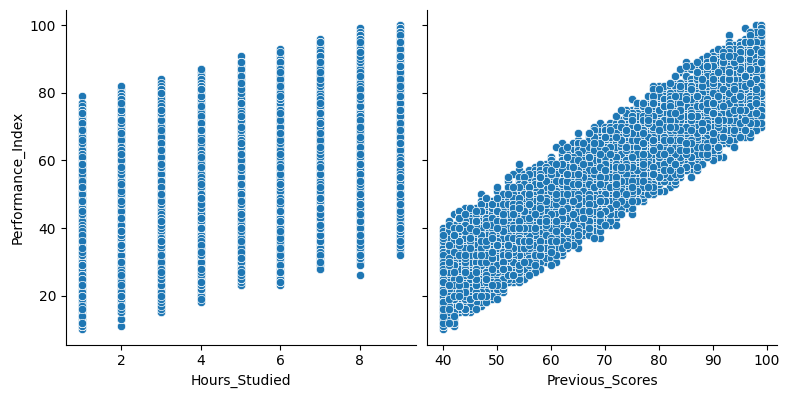

Intercept: -29.60536090045995
Coefficients: [2.86449217 1.01615225]
Mean Absolute Error: 1.8101437492369952
Mean Squared Error: 5.201346140631689
R-squared: 0.9859445764337783


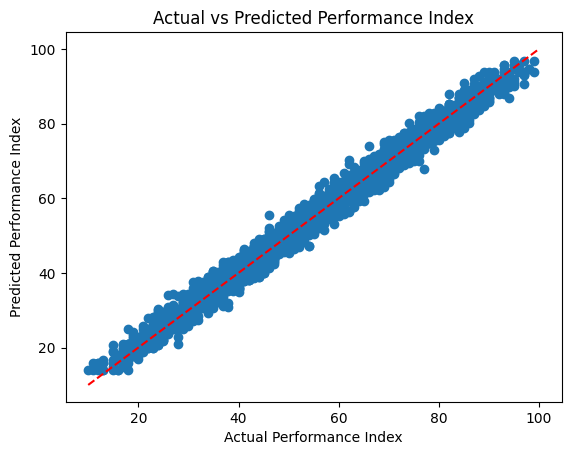

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
df = pd.read_csv("Student_Performance.csv")

# Prepare the features and target variable
X = df[['Hours_Studied', 'Previous_Scores']]  # Adjusted features
y = df['Performance_Index']  # Adjusted target variable

# Perform exploratory data analysis
print(df.corr(numeric_only=True))  # Only get numeric correlations
sns.pairplot(df, x_vars=['Hours_Studied', 'Previous_Scores'], y_vars='Performance_Index', height=4, aspect=1, kind='scatter')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the multivariable regression model
reg_model = linear_model.LinearRegression()
reg_model.fit(X_train, y_train)

# Print model coefficients
print('Intercept:', reg_model.intercept_)
print('Coefficients:', reg_model.coef_)

# Make predictions
y_pred = reg_model.predict(X_test)

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Visualize actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.show()
